# 크롤링한 뉴닉 데이터 분석

In [ ]:
!nvidia-smi

Wed Oct 13 01:28:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 모듈 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt

# read csv to pandas dataframe
first = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211002_onlylink.csv")
sample_1 = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_sample.csv")
sample_2 = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_sample_v2.csv")
train = pd.read_csv("/content/drive/MyDrive/data/newneek/newneek_211010_full.csv")
test = pd.read_csv("/content/drive/MyDrive/data/newneek/dacon_train.csv")

In [3]:
print(first.shape)
print(sample_1.shape)
print(sample_2.shape)
print(train.shape)
print(test.shape)

(2821, 6)
(44, 7)
(926, 7)
(2837, 7)
(87075, 2)


In [ ]:
display(first)

,기사id,카테고리,제목,날짜,요약문,원문
0,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"미국은 가까이 중국은 멀리: 미국과 계속 친하게 지내고, 중국을 견제하는 데 신경 ...",https://www.yna.co.kr/view/AKR20210929177100083
1,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,당장 크게 달라지긴 어려울 것 같아요. 아베 전 총리보다는 갈등을 잘 안 만들려는 ...,https://www.yna.co.kr/view/AKR2021092911590050...
2,0,NaN,기시다 후미오 일본 총리 당선,2021/10/01,"\n그는 2015년 외무상을 할 때, 박근혜 정부와 맺은 ‘한일 위안부합의’를 이끌...",https://terms.naver.com/entry.naver?docId=5144...
3,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,“백신 인증서 없으세요? 그럼 못 들어오세요.” 식당 들어갈 때 이런 말을 듣는다면...,https://go.seoul.co.kr/news/newsView.php?id=20...
4,1,코로나19,정부 백신 패스 도입 논의,2021/10/01,맞아요. 그래서 반대하는 목소리도 있어요 🤔.,https://www.hankookilbo.com/News/Read/A2021092...
...,...,...,...,...,...,...
2816,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,과연 아시아계 미국인들은 '공정하게' 뽑히고 있던 걸까요? 🙄 하버드 대학교의 아시...,https://www.reuters.com/article/us-harvard-adm...
2817,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"이번 판은 하버드의 승! 5년 만의 판결에서, 하버드가 일부러 차별한 건 아니라는 ...",https://www.nytimes.com/2018/06/15/us/harvard-...
2818,847,세계,재판스토리 in 하버드 ⚖️,2019/10/04,"+ 🙅 “아시아인들을 이용하지 마!” 처음 SFFA가 소송을 시작했을 때, 하버드의...",https://news.joins.com/article/11775777
2819,848,세계,가짜뉴스 가만두면 가만 안 둔다!,2019/10/04,"며칠 전, 싱가포르 양치기가 블로그에 공유한 뉴스: 늑대가 나타났다! 다음 날 자고...",https://www.yna.co.kr/view/AKR20191002086700076


In [ ]:
display(train)

,id,category,title,date,summary,original_text,url
0,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"모기가 옮기는 기생충질환으로 🦟, 감염되면 심한 오한이 들고 열이 나요. 옛날에는 ...",NaN,https://terms.naver.com/entry.naver?cid=51004&...
1,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"이유는 말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보...",2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는...,https://www.hani.co.kr/arti/international/inte...
2,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,WHO가 인정했으니 이제 전 세계에 백신을 공급하면 되는데요. 시간은 꽤 걸릴 것 ...,이재영 기자 기자 페이지 1987년 개발된 최초 백신…인류난제 극복 역사적 첫발 한...,https://www.yna.co.kr/view/AKR20211007003551088
3,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,웬만한 제품이나 부품은 중국에서 만들잖아요(=중국 별명 ‘세계의 공장’ 🏭). 만드...,viewer 중국 랴오닝성 선양에 있는 한 석탄화력 발전소의 굴뚝에서 연기가 솟아오...,https://www.sedaily.com/NewsVIew/22SLJJUOUR
4,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,중국은 호주랑 한바탕 싸우면서 ‘너네 석탄 안 사!’ 했어요. 호주가 석탄 수출해서...,전력난으로 중국 남부 광둥성 제조업 거점인 둥관 산업단지에 있는 한 공장에 불이 꺼...,https://www.joongang.co.kr/article/25011772#home
...,...,...,...,...,...,...,...
2832,1065,경제,코드명 스튜어드십코드🕵,2019/02/11,국민연금이 거기 왜 끼는데?😮국민연금은 국민의 노후를 보장하기 위해서 주식으로도 돈...,"◆ 국민연금, 한진칼 경영참여 ◆ 박능후 보건복지부 장관(맨 오른쪽)이 1일 오...",https://www.mk.co.kr/news/economy/view/2019/02...
2833,1065,경제,코드명 스튜어드십코드🕵,2019/02/11,+ 스튜어드십코드를 바라보는 또다른 관점 : 정치적인 이유로 국민연금의 스튜어드십코...,NaN,http://www.munhwa.com/news/view.html?no=201902...
2834,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"누가 그를 죽이라고 시켰는데?외신에 따르면, 사우디아라비아 빈살만 왕세자가 시킨 일...",NaN,https://www.washingtonpost.com/world/national-...
2835,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"+ 하지만 그러기엔 애플워치와 아이폰의 거리가 너무 멀었다며, 사실은 터키 정부가 ...",NaN,https://qz.com/1423401/jamal-khashoggi-the-pla...


In [ ]:
test.head()

,article_original,abstractive
86975,"벤처업계가 52시간 근로제와 관련, 탄력적 근로시간 정산 기간을 기존 3개월에서 1...",벤처업계는 법정 근로시간 관련 법률 개정은 자율적인 벤처기업 문화를 훼손할 우려가 ...
86976,백승현 기자 류장수 최저임금위원회 위원장이 최저임금 결정체계 개편이 지난해에 공식화...,최저임금 결정체계 개편이 지난해에 공식화되었음에도 불구하고 국회가 입법을 하지 않자...
86977,르노삼성자동차 직원 사이에서 이런 탄식이 이어지고 있다. 직원들의 우려대로 르노삼성...,직원들의 우려대로 르노삼성은 올해 1분기에 2015년 이후 최악의 판매량으로 떨어졌...
86978,"배태웅 기자 미국에서 헬스베리티, 베릴리 같은 업체가 나올 있는 배경은 개인정보보호...",미국에는 개인정보보호 제도의 기본 원칙이 '사후 동의'이기 때문에 다양한 개인정보가...
86979,박용만 대한상공회의소 회장은 1일 서울 태평로 한국프레스센터에서 열린 여기자 포럼 ...,박용만 대한상공회의소 회장은 1일 열린 '최근 경제진단과 양해 현안' 강연에서 규제...


In [2]:
category = train[['id', 'category']].groupby(['category']).count()  # 카테고리별 기사 개수

In [8]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

<BarContainer object of 9 artists>

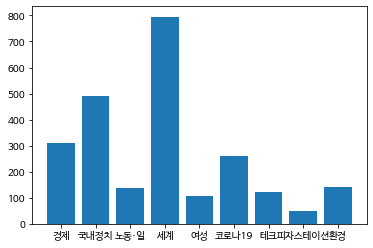

In [3]:
plt.rc('font', family='NanumBarunGothic') 
plt.bar(category.index, category['id'])

In [4]:
ref = []
for x in train['url']:
    try: ref.append(x.split('/')[2])
    except: ref.append('NULL')

In [5]:
# print(ref)

In [6]:
train['ref'] = ref
ref_df = train[['id', 'ref']].groupby(['ref']).count()

In [7]:
display(ref_df)

,id
ref,
NULL,3
abcnews.go.com,1
apnews.com,1
articles.dotface.kr,1
asia.nikkei.com,1
...,...
www.youngnong.co.kr,1
www.youtube.com,33
www.ytn.co.kr,37


<Figure size 1440x1440 with 0 Axes>

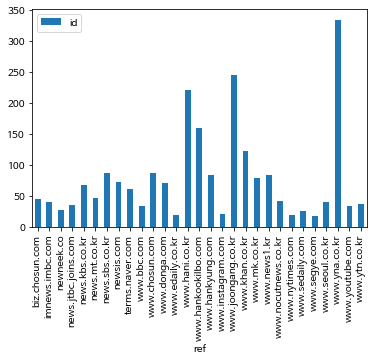

In [8]:
plt.figure(figsize=(20,20))
over_15 = ref_df[ref_df['id']>15]
over_15.plot(kind='bar')

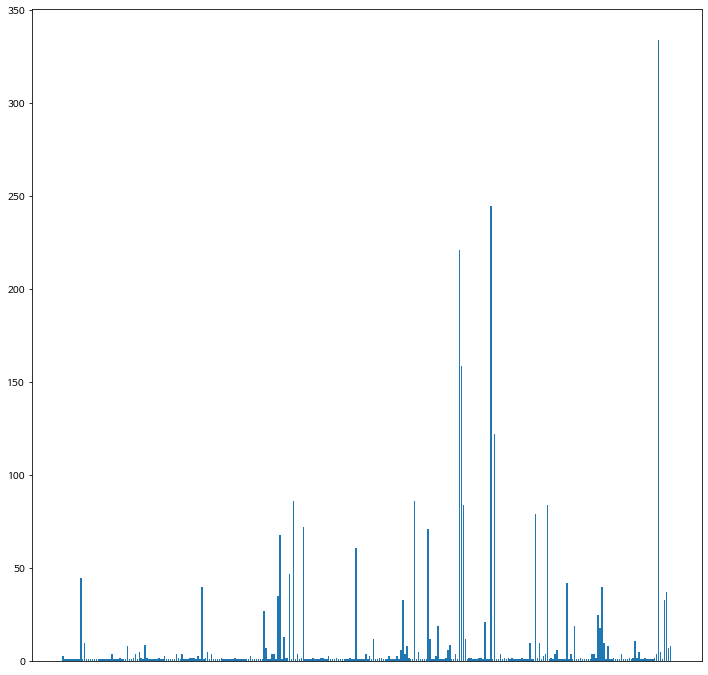

In [9]:
plt.figure(figsize=(12,12))
plt.bar(ref_df.index, ref_df['id'])
plt.xticks([])
plt.show()

In [10]:
train['ref'].nunique()

312

In [11]:
len(over_15)

29

In [12]:
over_15.index

Index(['biz.chosun.com', 'imnews.imbc.com', 'newneek.co',
       'news.jtbc.joins.com', 'news.kbs.co.kr', 'news.mt.co.kr',
       'news.sbs.co.kr', 'newsis.com', 'terms.naver.com', 'www.bbc.com',
       'www.chosun.com', 'www.donga.com', 'www.edaily.co.kr', 'www.hani.co.kr',
       'www.hankookilbo.com', 'www.hankyung.com', 'www.instagram.com',
       'www.joongang.co.kr', 'www.khan.co.kr', 'www.mk.co.kr', 'www.news1.kr',
       'www.nocutnews.co.kr', 'www.nytimes.com', 'www.sedaily.com',
       'www.segye.com', 'www.seoul.co.kr', 'www.yna.co.kr', 'www.youtube.com',
       'www.ytn.co.kr'],
      dtype='object', name='ref')

In [13]:
train['length'] = [len(str(x)) for x in train['original_text']]

(array([1.096e+03, 5.600e+02, 6.030e+02, 3.280e+02, 1.240e+02, 4.800e+01,
        2.800e+01, 2.000e+01, 7.000e+00, 4.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.00000e+00, 7.55300e+02, 1.50760e+03, 2.25990e+03, 3.01220e+03,
        3.76450e+03, 4.51680e+03, 5.26910e+03, 6.02140e+03, 6.77370e+03,
        7.52600e+03, 8.27830e+03, 9.03060e+03, 9.78290e+03, 1.05352e+04,
        1.12875e+04, 1.20398e+04, 1.27921e+04, 1.35444e+04, 1.42967e+04,
        1.50490e+04]),
 <a list of 20 Patch objects>)

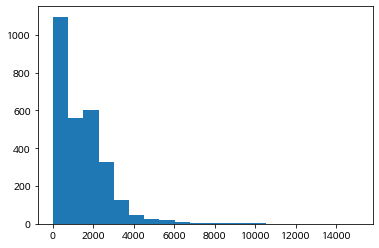

In [14]:
plt.hist(train['length'], bins=20)

In [15]:
nan = train[train['length'] == 3]
full = train[train['length'] > 3]

In [16]:
display(nan)

,id,category,title,date,summary,original_text,url,ref,length
0,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"모기가 옮기는 기생충질환으로 🦟, 감염되면 심한 오한이 들고 열이 나요. 옛날에는 ...",NaN,https://terms.naver.com/entry.naver?cid=51004&...,terms.naver.com,3
5,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,물건 못 만드는데 이건 또 무슨 소리일까요? 중국 정부가 온실가스를 줄이려고 잡은 ...,NaN,https://www.ajunews.com/view/20211004133141153,www.ajunews.com,3
6,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,하지만 이번엔 성격이 좀 달라요. 전 세계 물가는 오르는데 경제는 더 착 가라앉을...,NaN,https://qz.com/2068772/why-economists-are-talk...,qz.com,3
10,2,국내정치,넷플릭스 인 더 국정감사,2021/10/07,제작비 줄게 저작권 다오: 보통 넷플릭스는 사전에 제작비를 대주는 대신 저작권을 다...,NaN,http://www.mediatoday.co.kr/news/articleView.h...,www.mediatoday.co.kr,3
13,3,경제,주식시장 파란불 뜬 이유 (1),2021/10/07,나라가 얼마까지 빚을 질 수 있는지 정해둔 걸(=부채한도) 늘리는 협상을 하는 거예...,NaN,https://news.einfomax.co.kr/news/articleView.h...,news.einfomax.co.kr,3
...,...,...,...,...,...,...,...,...,...
2829,1037,NaN,제주 4·3 사건 72주기,2019/04/03,제주 4·3 사건은 한국 현대사에서 한국전쟁 다음으로 인명 피해가 많은 사건으로 기...,NaN,https://www.youtube.com/watch?v=M0oetkBf_Fc,www.youtube.com,3
2833,1065,경제,코드명 스튜어드십코드🕵,2019/02/11,+ 스튜어드십코드를 바라보는 또다른 관점 : 정치적인 이유로 국민연금의 스튜어드십코...,NaN,http://www.munhwa.com/news/view.html?no=201902...,www.munhwa.com,3
2834,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"누가 그를 죽이라고 시켰는데?외신에 따르면, 사우디아라비아 빈살만 왕세자가 시킨 일...",NaN,https://www.washingtonpost.com/world/national-...,www.washingtonpost.com,3
2835,1079,세계,사라진 사우디 언론인 🇸🇦,2018/10/15,"+ 하지만 그러기엔 애플워치와 아이폰의 거리가 너무 멀었다며, 사실은 터키 정부가 ...",NaN,https://qz.com/1423401/jamal-khashoggi-the-pla...,qz.com,3


In [17]:
nan_ref = nan[['id', 'ref']].groupby(['ref']).count()

([], <a list of 0 Text major ticklabel objects>)

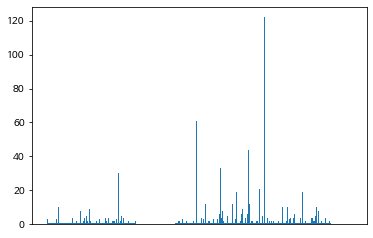

In [18]:
plt.bar(nan_ref.index, nan_ref['id'])
plt.xticks([])

In [19]:
again = nan_ref[nan_ref['id']>10]
display(again)

,id
ref,
imnews.imbc.com,30
newneek.co,27
news.kmib.co.kr,13
terms.naver.com,61
view.asiae.co.kr,12
www.bbc.com,33
www.dongascience.com,12
www.edaily.co.kr,19
www.hankookilbo.com,44


In [20]:
# 결측치 처리
print(train.isnull().sum())
train['category'].fillna(0, inplace = True)
train.dropna(inplace = True)

id                  0
category          423
title               0
date                0
summary             0
original_text    1024
url                 0
ref                 0
length              0
dtype: int64


In [21]:
# 텍스트 전처리
# 이모지 없애기
!pip install emoji

import emoji
import re

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def preprocess_text(text):
    text = text.replace(u'\xa0', u' ')  # html 처리
    email = re.compile('^[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$')  # email 처리
    text = re.sub(email, " ", text)
    return text

train['title'] = train['title'].apply(give_emoji_free_text)
train['title'] = train['title'].apply(preprocess_text)
train['summary'] = train['summary'].apply(give_emoji_free_text)
train['summary'] = train['summary'].apply(preprocess_text)
train['original_text'] = train['original_text'].apply(preprocess_text)

In [ ]:
display(full)

,id,category,title,date,summary,original_text,url,ref,length
1,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,"이유는 말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보...",2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는...,https://www.hani.co.kr/arti/international/inte...,www.hani.co.kr,1192
2,0,세계,WHO 말라리아 백신 접종 권고,2021/10/08,WHO가 인정했으니 이제 전 세계에 백신을 공급하면 되는데요. 시간은 꽤 걸릴 것 ...,이재영 기자 기자 페이지 1987년 개발된 최초 백신…인류난제 극복 역사적 첫발 한...,https://www.yna.co.kr/view/AKR20211007003551088,www.yna.co.kr,2299
3,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,웬만한 제품이나 부품은 중국에서 만들잖아요(=중국 별명 ‘세계의 공장’ ). 만드는...,viewer 중국 랴오닝성 선양에 있는 한 석탄화력 발전소의 굴뚝에서 연기가 솟아오...,https://www.sedaily.com/NewsVIew/22SLJJUOUR,www.sedaily.com,1269
4,1,경제,주식시장 파란불 켜진 이유 (2): 중국발 인플레 공포,2021/10/08,중국은 호주랑 한바탕 싸우면서 ‘너네 석탄 안 사!’ 했어요. 호주가 석탄 수출해서...,전력난으로 중국 남부 광둥성 제조업 거점인 둥관 산업단지에 있는 한 공장에 불이 꺼...,https://www.joongang.co.kr/article/25011772#home,www.joongang.co.kr,3110
7,2,국내정치,넷플릭스 인 더 국정감사,2021/10/07,넷플릭스는 지금까지 한국 콘텐츠에 투자를 많이 해왔어요. 우리나라에 진출한 2016...,"오징어게임 스틸컷. /사진=넷플릭스 ""넷플릭스를 통해 한국의 콘텐츠는 말 그대로 전...",https://news.mt.co.kr/mtview.php?no=2021092913...,news.mt.co.kr,2838
...,...,...,...,...,...,...,...,...,...
2826,1026,세계,파리의 심장이 불탔다,2019/04/17,지금은 불이 꺼졌나?오후 7시쯤 시작된 불길은 지붕의 2/3를 태우고 첨탑까지 무너...,"성혜미 기자 기자 페이지 ""센 강이 바로 옆인데""…목재 구조물, 소방 시스템 미비도...",https://www.yna.co.kr/view/AKR2019041608420000...,www.yna.co.kr,1528
2828,1037,0,제주 4·3 사건 72주기,2019/04/03,국방부가 72년 만에 ‘제주 4·3사건’ 희생자들에게 애도를 표한대요.,국방부가 군·경의 무력 진압으로 수많은 양민이 희생된 '제주 4·3사건'에 대해 사...,https://news.jtbc.joins.com/article/article.as...,news.jtbc.joins.com,819
2830,1037,0,제주 4·3 사건 72주기,2019/04/03,50년이 지나도록 진상규명이 이루어지지 않았었는데요. 2000년에야 정부 차원의 진...,노무현 전 대통령과 문재인 대통령. 문재인 대통령이 3일 제주 4·3사건 70주년 ...,https://www.hani.co.kr/arti/politics/politics_...,www.hani.co.kr,276
2831,1037,0,제주 4·3 사건 72주기,2019/04/03,"+ 매해 4월 3일 전후에는 정치권에서 특별법 통과를 약속하는 사람들은 많지만, 진...",제주4·3유족회가 지난달 10일 제주시 관덕정 앞 광장에서 기자회견을 열고 제주4·...,https://www.hani.co.kr/arti/society/area/88823...,www.hani.co.kr,535


In [22]:
full.reset_index(drop=True, inplace=True)

# 샘플 찍어보기
for i in range(0, 1800, 100):
    print("요약:", full['summary'][i])
    print("원문:", full['original_text'][i])
    print("-"*100)

요약: 이유는  말라리아는 기생충이 주범이라, 코로나19처럼 바이러스가 퍼뜨리는 다른 병보다 더 끈질기고 퇴치가 어렵거든요. 또 말라리아 기생충은 한 사람이 여러 번 감염될 정도로 사람의 면역체계를 피해가는 능력이 뛰어나다고. 하지만 한 영국 제약사가 30년 동안 연구한 끝에 백신 개발에 성공해 2019년부터 가나·케냐 등에서 어린이 약 80만 명에게 시범으로 백신을 맞혔어요 💉. 
원문: 2019년 11월 말라위의 한 마을 주민들이 말라리아 백신 접종 시범사업에 참여하는 아이들을 데리고 순서를 기다리고 했다. AP 연합뉴스 세계보건기구(WHO)가 최초로 말라리아 백신 사용을 승인했다. 열대지방을 중심으로 많은 어린이들 목숨을 앗아가는 말라리아에 대한 백신 보급이 연간 수십만명을 살릴 수 있을지 기대된다. <에이피>(AP) 통신은 테워드로스 아드하놈 거브러여수스 세계보건기구 사무총장이 6일 기자회견에서 말라리아 백신 RTS,S의 아프리카 3개국 시범 접종사업이 성공적이었다며 이 백신에 대한 승인을 발표했다고 보도했다. 거브러여수스 사무총장은 “난 말라리아 연구자였으며, 이 오래되고 악랄한 질병에 효과적인 백신을 가질 날을 고대해왔다”며 “오늘은 역사적인 날이다. 세계보건기구는 세계 최초 말라리아 백신의 광범위한 사용을 권장한다”고 말했다. 모스퀴릭스(Mosquirix)로도 불리는 RTS,S 백신은 영국 제약사 글락소스미스클라인이 개발한 제품으로 2019년 시작한 시범 접종사업에서 가나, 케냐, 말라위 어린이 약 80만명에게 접종됐다. 이 사업에서 백신의 말라리아 예방률은 39%, 중증 예방률은 29%로 그리 높지 않은 것으로 나타났다. 하지만 이 백신과 말라리아 치료제를 함께 복용하면 입원율과 사망률이 70% 감소하는 것으로 나타났다. 현재 통용되는 항말라리아제는 예방 목적으로도 사용된다. 거브러여수스 사무총장은 “현존하는 말라리아 예방 수단과 이 백신을 함께 사용하면 매년 수만명의 어린 목숨을 구할 수 있을 것”이라고 했다. 모기가 옮기는 기생충이 증식을 위